**<h1>Sistema Masa-Resorte: Solución mecánica bajo la formulación Hamiltoniana**</h1>


**Integrantes:**
1. Jerónimo López Gómez C.C. 10017353334
2. Valentina Lobo Ruiz C.C. 1067912559

## **Planteamento del problema**

Los distintos tipos de osciladores son los sistemas más ubicuos analizados por medio de la mecánica clásica, muchos sistemas presentan un movimiento aproximado de armónico simple. Los métodos hamiltoneados, en particular la representación del espacio de fases, nos permiten realizar un analísis profundo y detallado del sistema; por otro lado, se puede considerar que  la invariancia adiabática es más relevante que la conservación de la energía. Por todo lo anteriormente mencionado, en este trabajo se hará el desarrollo analítico y númerico de la mecánica hamiltoneana de un sistema masa-resorte unidimensional, así mismo se analizará la invariancia adiabática del sistema cuando presenta cambios pequeños de su masa a lo largo de un periodo.

## **Desarrollo teórico y discusión**

Planteemos el modelo diferencial que gobierna el comportamiento de un sistema masa-resorte unidimensional, tal y como se sigue:

\begin{equation}
m \ddot x + b\dot x + kx = f(t,x)
\end{equation}

La expresión anterior denota la fuerza total que actual sobre el sistema masa resorte en todo instante de tiempo, a excepción del instante en t = 0 en el cuál se asumirá que 

\begin{equation} \tag{2}
F(t=0) = -kx(t)
\end{equation}

Por lo que la energia total del sistema $E(t=0)$ es netamente de naturaleza potencial elástica

\begin{equation} \tag{3}
E(t=0) = - \int{Fdx} = \frac{1}{2}kx(t)^2
\end{equation}

Luego la segunda forma de $E$ para todo tiempo $t$ esta dada por la componente cinética. Se llega a que la energía total del sistema elástico esta dada por (sin considerar efectos disipativos, con lo que $b=0$):

\begin{equation} \tag{4}
E = \frac{1}{2}kx(t)^2 + \frac{1}{2}m \dot x(t)^2
\end{equation}

El momento canónico del sistema en función de la coordenada $x$ es $p_x = m \dot x$, por lo que la función hamiltoniana del mismo esta dada por $H(x, p_x)$

\begin{equation} \tag{5}
H(x, p_x) = \frac{p_x^2}{2m} + \frac{1}{2}kx^2 = \frac{p_x^2}{2m} + \frac{m \omega_0^2 x^2}{2}, \omega_0 = \sqrt{\frac{k}{m}}
\end{equation}

Considerando que $H$ no depende del tiempo, por lo cuál esta cantidad es conservada entonces seguidamente se puede definir la respectiva ecuación de Hamilton - Jacobi para el sistema masa-resorte, en función de la acción $S = S_0 + E(\Delta t)$ que dada la naturaleza conservativa del sistema toma la forma $S = S_0 + E_{cte}$, además asumiendo que S es la función generadora de la transformación canónica de coordenadas $(q, p) \rightarrow (Q, P)$ con lo cuál las ecuaciones de transformación quedan definidas como se sigue 

\begin{equation} \tag{6}
p = \frac{\partial S_0}{\partial q}, \ \ Q = \frac{\partial S_0}{\partial P}, \ \ H' = H + \frac{\partial S_0}{\partial t} = E
\end{equation}

De lo cuál se nota que el último termino corresponde a la ecuación de Hamilton-Jacobi $(H-J)$ de la respectiva transformación, en particular para el sistema en cuestión la ecuación $H-J$ quedaría expresada como

\begin{equation} \tag{7}
\frac{1}{2m}\left(\frac{\partial S_0}{\partial x}\right)^2 + \frac{1}{2}m \omega_0^2 x^2 = E, \ \ \frac{\partial S_0}{\partial t}=0
\end{equation}

Luego integrando para $S_0$ respecto a $x$ se llega a la forma general de la acción abreviada $S_0$ en función de $x$ y $E$ constante

\begin{equation} \tag{8}
S_0(x, E) = m\omega_0 \int_0^x \sqrt{\frac{2E}{m\omega_0^2}-x'^2} \ dx'
\end{equation}

Resolviendo la integral en su forma explicita se llega a lo siguiente:




In [12]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing()

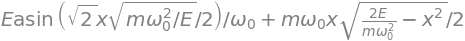

In [73]:
# Definición de símbolos
sym = sp.symbols('t_0 t x S_0 omega_0 m E p')
t_0, t, x, S_0, omega_0, m, E, p = sym[0], sym[1], sym[2], sym[3], sym[4], sym[5], sym[6], sym[7]

S0 = m*omega_0*x/2*(sp.sqrt(2*E/(m*omega_0**2)-x**2)) + E/omega_0*sp.asin(sp.sqrt(m*omega_0**2/(2*E))*x)
S0

\begin{equation} \tag{9}

S_0(q, E) = \frac{m \omega_0}{2} x \left( \sqrt{\frac{2E}{m\omega_0^2} - x^2} \right) + \frac{E}{\omega_0} \sin^{-1} \left( \sqrt{\frac{m\omega_0^2}{2E}} x \right)

\end{equation} \tag{9}

Sabiendo que $\frac{\partial S}{\partial E} = \frac{\partial S_0}{\partial E} + \Delta t = cte$ tomamos ahora las cantidades $p = \frac{\partial S_0}{\partial x}, \ \ Q_E = \frac{\partial S_0}{\partial E}$

De la ecuación (8) se observa que $\frac{\partial S_0}{\partial x}$

\begin{equation} \tag{10}

p = \frac{\partial S_0}{\partial x} =  m\omega_0 \sqrt{\frac{2E}{m\omega_0^2}-x^2}

\end{equation} \tag{10}

Por lo tanto

In [79]:
Q_E = sp.Eq(t-t_0, S0.diff(E)) 
X = sp.solve(Q_E, x)
sp.simplify(sp.Eq(x, X[0]))

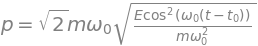

In [100]:
P = m*omega_0*sp.sqrt(2*E/(m*omega_0**2) - x**2)

P = sp.Eq(p,sp.simplify(P.subs(x, X[0])))
P

Ahora se quiere observar el diagrama de fases del sistema hamiltoniano que muestra las trayectorias de los puntos en el espacio de fases, lo que ayuda a visualizar cómo cambian la pocisión $x(t)$ y el momento total $p$ del oscilador a lo largo del tiempo. Esto es esencial para comprender el comportamiento dinámico del mismo, además se pueden identificar puntos de equilibrio y su estabilidad. Los puntos de equilibrio pueden ser estables, inestables o neutros, y esto afecta cómo el sistema responde a pequeñas perturbaciones.

se llega a que 

\begin{equation} \tag{11}

p^2 + x^2  = 2mE \cos^2{\omega_0 \Delta t} + \frac{2E}{m \omega_0^2} \sin^2{\omega_0 \Delta t}

\end{equation} \tag{11}

\begin{equation} \tag{12}

\frac{p^2}{m^2 \omega_0^2} + x^2  = \frac{2E}{m \omega_0^2}

\end{equation} \tag{12}

Representa de paramétricamente una elipse con semiejes $b = \frac{1}{\omega_0} \sqrt{\frac{2E}{m}}$ y $a = \omega_0 \sqrt{2 m E}$ con un área encerrada $A = 2\pi E$

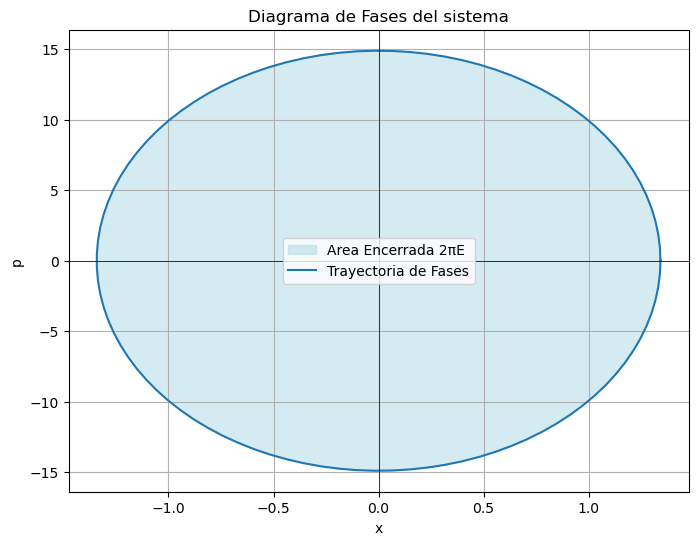

In [4]:
#DIAGRAMA DE FASES DEL SISTEMA HAMILTONIANO

import numpy as np
import matplotlib.pyplot as plt

E, omega_0, m = 10, 0.3, 1 # parámetros iniciales

# Parámetros de la elipse
a = omega_0*np.sqrt(2*m*E)  # semi-eje mayor

b = 1/omega_0 * np.sqrt(2*E/m)  # semi-eje menor

# Generar ángulos theta
theta = np.linspace(0, 2 * np.pi, 100)

# Coordenadas de la elipse
x = a * np.cos(theta)
y = b * np.sin(theta)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.fill(x, y, color='lightblue', alpha=0.5, label = 'Area Encerrada 2πE')
plt.plot(x, y, label='Trayectoria de Fases')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Diagrama de Fases del sistema')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
#plt.gca().set_aspect('equal', adjustable='box')  # Igualar la relación de aspecto
plt.legend()
plt.show()


## **Variable de acción para el sistema masa-resorte**
En el caso donde $H(q, p)$ es independiente del tiempo, por consiguiente la energía se conserva y la variable de acción del sistema esta dada por la acción $S(q, E)$ que satisface a su vez la ecuación de Hamilton - Jacobi, por lo tanto en este caso la variable de acción depende directamente con la acción del sistema periodico, donde en este tipo de sistemas, lo importante en muchos casos es hallar las frecuencias del movimiento periodico mas que la trayectoria del mismo, es aqui donde la Variables de ángulo-acción cobran importancia en este tipo de sistemas **[cita libretexts]**. Considerando como $I$ la variable de acción que toma la integral cerrada alrededor de 1 solo periodo de oscilación del movimiento, entonces se define como:

\begin{equation} \tag{13}

I = \frac{1}{2 \pi} \oint p(x)dx = \frac{1}{2 \pi} \iint dp(x) dx

\end{equation} \tag{13}

Por lo que para el caso del sistema que es objeto de estudio tomaria la forma

\begin{equation} \tag{14}

I = \frac{1}{2 \pi} \oint p(x)dx = \frac{1}{2 \pi} \iint dp(x) dx

\end{equation} \tag{14}

## **Invarianza adiabática del sistema masa-resorte**

Ya vimos en caso en el que el Hamiltoneado es independiente del tiempo. Ahora, suponemos un hamiltoneano $H(x,p_x, t) $ y una energía que depende levemente del tiempo. Para lograr que la dependencia sea débil, se escoge un parámetro ($\lambda$) del sistema que varíe poco a lo largo de un período (se puede observar en la ecuación **###**). Para el sistema estudiado en este trabajo, se puede escoger la masa $m(t)$ y/o la constante de elásticidad $k(t)$  como la variable que presentará pequeños cambios a lo largo de un período. Cuando existe una variacón en  ($\lambda$) el movimiento se denomina como pertubado.

\begin{equation} \tag{PONER}
E(t) = H(x, p_x, t) = H(x, p_x, \lambda (t))
\end{equation}

Siguiendo con el analísis para un sistema pertubado lentamente, veamos la taza de cambio de la energía respecto al tiempo.

\begin{equation} \tag{PONER}
\frac{d E(t)}{dt} = \frac{\partial H}{\partial \lambda} \frac{d \lambda}{dt}
\end{equation}

Cuyo promedio a lo largo de un periodo es:

\begin{equation} \tag{PONER}
\overline{ \frac{d E(t)}{dt}} = \frac{d \lambda}{dt} \frac{1}{T} \int_0^T \frac{\partial H}{\partial \lambda} dt
\end{equation} 


https://physics.stackexchange.com/questions/600117/adiabatic-invariant-in-variable-mass-oscillator

